# 2. Self-organising mosaic (Stage 1a: retinal mosaic)
This Jupyter notebook demonstrates how to generate a self-organising mosaic that uses reaction-diffusion modelling. ERICA uses the Numba JIT compiler (http://numba.pydata.org/) to speed up the reaction-diffusion computations, however, this is still a computationally demanding process and may be quite slow depending on the system that you try to model and the performance of your computer. As an alternative, a large pre-generated mosaic is provided with ERICA. Please also note that the kernel for this Juyter notebook may crash if you use a large system or many iterations. If you want to work with large systems we recommend writing and running a Python script instead. This notebook example works with a small system only, for demonstration purposes.

First we import the relevant modules:

In [11]:
# Set matplotlib up
%matplotlib inline

import numpy
import os
import sys

from matplotlib import pyplot
from astropy.io import fits

from ERICA import reaction_diffusion, peak_detection

In [12]:
# Set up where data are saved - here we use the default folder "Reaction_diffusion_outputs" within the main directory
current_directory = os.getcwd()
save_folder_rd_output = os.path.normpath(os.path.join(current_directory, 'Reaction_diffusion_outputs'))
if os.path.isdir(save_folder_rd_output) == 0:
    os.mkdir(save_folder_rd_output)

## 2.1 Generate a mosaic of spots
In the first example we generate spots with (pseudo)homogenous spacing across the reaction-diffusion system.

First, we set the parameters for the reaction diffusion model (see the ERICA publication for more details):

In [13]:
# Use the recommended parameters for the reaction-diffusion system - to produce a pattern of spots (visible as the
# final concentration of V) the following parameters can be used: Du= 0.14, Dv= 0.06, f = 0.035, k = 0.065
reaction_diffusion_parameters = (0.14, 0.06, 0.035, 0.065)

# Set the size of the reaction-diffusion system (pixels). The recommended size for demonstration purposes is 100
rd_system_size = [100,100]

# The number of iterations to complete.
iterations = 20000

Run the reaction-diffusion simulation (this may take a short amount of time):

In [14]:
rd_output = reaction_diffusion.runReactionDiffusion(reaction_diffusion_parameters, iterations, rd_system_size[0], rd_system_size[1])


Then we can look at the output (final concentration of chemical V):

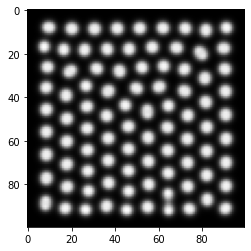

In [15]:
# Create a figure
fig_1 = pyplot.figure(1, figsize=(10,4))

# Add a subplot
ax1_1 = fig_1.add_subplot(121)

# Show the output of the reaction-diffusion simulation
ax1_1.imshow(rd_output, cmap='gray')

The final step is to detect the locations of the spots that are produced:

In [16]:
# Detect all of the peaks (returns and array of (n,2) where the n is the number of peaks and the positions
# are vertical, horizontal)
all_peaks, estimated_spot_spacing = peak_detection.findUniformPeaks(rd_output)

# Remove the peaks from the edge as they tend to be lined up with the edge of the system
peaks, idx = peak_detection.removeEdgePeaks(all_peaks, estimated_spot_spacing*0.5)

/Users/laurayoung/Documents/Repositories/erica_final/ERICA/ERICA_toolkit.py:585: RuntimeWarning: invalid value encountered in true_divide
  radial_sum = numpy.where(nr==0.0, numpy.nan, tbin / nr)
/Users/laurayoung/Documents/Repositories/erica_final/ERICA/peak_detection.py:118: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  max_filter_output = peak_local_max(image, indices=False, min_distance=minimum_separation)


The positions of the spots can eventually be used as <span style='background-color:rgb(251,230,215)'>cone locations</span> when generating a ground-truth retina (notebook 3), so we would normally want to save these to file for later use (<span style='background-color:rgb(251,230,215)'>mosaic_example.fits</span>):

In [17]:
# Save the peaks to a file to use as the raw cone locations (these are not scaled to match histology yet)
# Here we store the data in a .fits file. More information on the .fits format is given in Notebook 3.
fits.writeto(os.path.normpath(os.path.join(save_folder_rd_output, 'mosaic_example.fits')),peaks, overwrite=True)

Overlay the output so we can check that the peaks were detected correctly (note that the cones around the edge are ignored as the boundary tends to make these more regular):

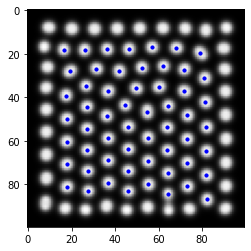

In [18]:
# Create a figure
fig_2 = pyplot.figure(2, figsize=(10,4))

# Add a subplot
ax2_1 = fig_2.add_subplot(121)

# Show the output of the reaction-diffusion simulation
ax2_1.imshow(rd_output, cmap='gray')

ax2_1.scatter(peaks[:,1],peaks[:,0], s=10, color='b')

## 2.2 Generate a foveated mosaic
Here we see an example in which a self-organising foveated mosaic of spots is generated by using a radially varying diffusion coefficient for chemical V. Note that the radial variation is arbitrary and not designed to generate spot spacings representative of cone spacings in a real human retina. In practice, we foveate the mosaic later by applying an eccentricity-dependent scaling to the positions of spots generated using the non-foveated method above - see notebook 03_Ground_truth_retina.

In [19]:
#  Use the same reaction diffusion coefficients as before for the centre
reaction_diffusion_parameters_foveated = [0.14, 0.04, 0.035, 0.065]

#  Set the change in the diffusion coefficient for chemical V from the centre to the edge (a positive value will 
# lead to an increase in spot spacing towards the edge)
Dv_gradient = 0.4e-3

# Set the size of the reaction-diffusion system (pixels). The recommended size for demonstration purposes is 300
rd_system_size = [300,300]

# The number of iterations to complete.
iterations = 20000

rd_output_foveated = reaction_diffusion.runReactionDiffusion(reaction_diffusion_parameters_foveated, iterations, rd_system_size[0], rd_system_size[1], foveated=True, Dv_gradient=Dv_gradient)


Finally show the output to see the radial variation in spot spacing:

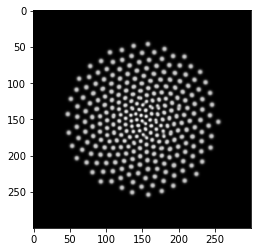

In [20]:
# Create a figure
fig_3 = pyplot.figure(3, figsize=(10,4))

# Add a subplot
ax3_1 = fig_3.add_subplot(121)

# Show the output of the reaction-diffusion simulation
ax3_1.imshow(rd_output_foveated, cmap='gray')